In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler

In [42]:
df=pd.read_csv('Downloads/DOM_hourly.csv')
df['Datetime']=pd.to_datetime(df['Datetime'])
df=df.sort_values('Datetime')

In [43]:
target_col='DOM_MW'
data=df[[target_col]].values

In [44]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [48]:
def create_dataset(data,time_steps=24):
    x,y=[],[]
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(x),np.array(y)

x,y=create_dataset(data)
x=x.reshape((x.shape[0],x.shape[1],1))
split=int(len(x)*0.8)
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [59]:
def train_model(model_layer):
    model=Sequential([
        model_layer(64, activation='tanh', input_shape=(24,1)),
        Dense(1)
    ])
    model.compile(optimizer='adam',loss='mse')
    model.fit(x_train,y_train,epochs=1)
    pred=model.predict(x_test)
    loss=model.evaluate(x_test,y_test)
    return loss,pred

In [60]:
rnn_loss,rnn_pred=train_model(SimpleRNN)
print("RNN:",rnn_loss)
lstm_loss,lstm_pred=train_model(LSTM)
print("LSTM:",lstm_loss)
gru_loss, gru_pred = train_model(GRU)
print("GRU:",gru_loss)

727/727 [==============================] - 1s 2ms/step - loss: 1.6628e-04
RNN: 0.0001662785653024912
727/727 [==============================] - 3s 4ms/step - loss: 3.2714e-04
LSTM: 0.0003271378518547863
727/727 [==============================] - 3s 3ms/step - loss: 1.9236e-04
GRU: 0.0001923630479723215


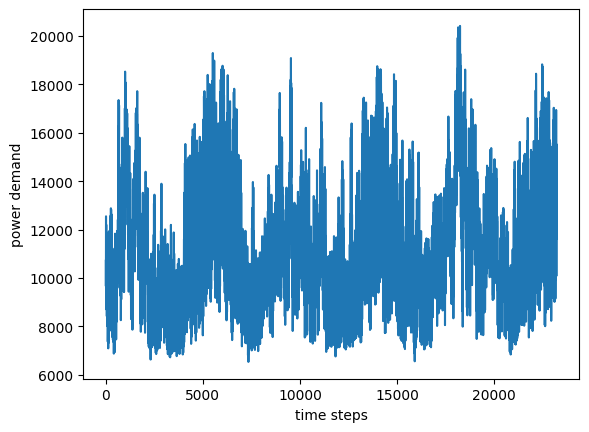

In [62]:
rnn_pred_inverse=scaler.inverse_transform(rnn_pred)
plt.plot(rnn_pred_inverse,label="RNN")
plt.xlabel('time steps')
plt.ylabel('power demand')
plt.show()